

*Ingeniería Electrónica*

##     <u>**Actividad Práctica N°1**</u>

##      **Representación de sistemas y controladores**




###      **Sistema de Control II**

 **FCEFyN (UNC)**

###     **2025**



###     **Profesor: Julian Pucheta**
###     **Alumna: Macarena V. González**
<a name="beginToc"></a>

## Table of Contents
&emsp;[<u>**Actividad Práctica N°1**</u>](#-underline-textbf-actividad-práctica-n-1-)

&emsp;[**Representación de sistemas y controladores**](#-textbf-representación-de-sistemas-y-controladores-)

&emsp;&emsp;[**Sistema de Control II**](#-textbf-sistema-de-control-ii-)

&emsp;&emsp;[**2025**](#-textbf-2025-)

&emsp;&emsp;[**Profesor: Julian Pucheta**](#-textbf-profesor-julian-pucheta-)

&emsp;&emsp;[**Alumna: Macarena V. González**](#-textbf-alumna-macarena-v-gonzález-)

&emsp;&emsp;[<u>\- Datos proporcionados del sistema eléctrico</u>](#-underline-datos-proporcionados-del-sistema-eléctrico-)

&emsp;&emsp;&emsp;[1)Representaciones de variables de estado:](#1-representaciones-de-variables-de-estado-)

&emsp;&emsp;&emsp;[2)Curvas del circuito RLC para una entrada de 12V:](#2-curvas-del-circuito-rlc-para-una-entrada-de-12v-)

&emsp;&emsp;[Consignas a resolver →(ítems)](#consignas-a-resolver-ítems-)

&emsp;&emsp;[Ítem\[1\]](#ítem-1-)

&emsp;&emsp;&emsp;[Resolución](#resolución)

&emsp;&emsp;[Conclusiones](#conclusiones)

<a name="endToc"></a>

# <span style="color:rgb(213,80,0)">**Caso de estudio 1: Sistema de dos variables de estado**</span>

&nbsp;&nbsp;&nbsp;&nbsp; Para este caso de estudio se plantea un sistema eléctrico RLC cuyo  comportamiento se encuentra modelado en variables de estado, este modelo puede  obtenerse a partir de las ecuaciones diferenciales que surgen de la aplicación directa de  la ley de Kirchhoff de las tensiones a la malla del circuito.


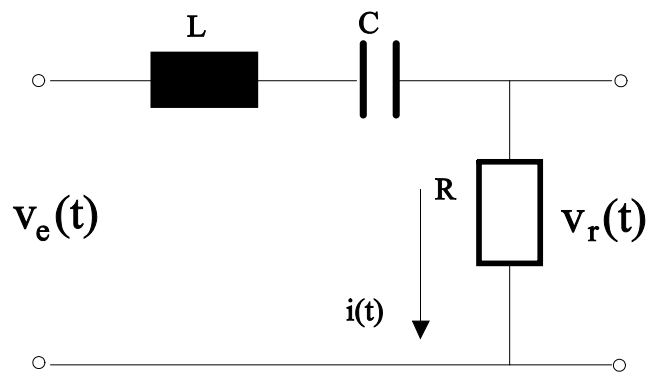


Fig: Esquemático del circuito RLC


$$\begin{array}{l} V_e \left(t\right)=V_L \left(t\right)+V_c \left(t\right)+V_r \left(t\right)\newline V_e \left(t\right)=L\frac{\mathrm{di}\left(t\right)}{\mathrm{dt}}+V_c \left(t\right)+\mathrm{Ri}\left(t\right)\newline \mathrm{donde}\;\;\;\;V_c \left(t\right)=\frac{1}{C}\int i\left(t\right)\mathrm{dt}\newline {V_o \left(t\right)=V}_r \left(t\right)=\mathrm{Ri}\left(t\right) \end{array}$$

### <u>\- Datos proporcionados del sistema eléctrico</u>

####       1)Representaciones de variables de estado:

$$\dot{x} =\mathrm{Ax}\left(t\right)+\mathrm{Bu}\left(t\right)$$

$$y=c^T x\left(t\right)$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Donde las matrices contienen a los coeficientes del circuito:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $A=\left\lbrack \begin{array}{cc} -\frac{R}{L} & -\frac{1}{L}\newline \frac{1}{C} & 0 \end{array}\right\rbrack$ , $B=\left\lbrack \begin{array}{c} \frac{1}{L}\newline 0 \end{array}\right\rbrack$ , $c^T =\left\lbrack \begin{array}{cc} R & 0 \end{array}\right\rbrack$


Con estos datos  y las ecuaciones diferenciales se puede definir como variables de estado  a :


$$\begin{array}{l} x_1 =i\left(t\right)\;\newline \;x_2 =V_c \left(t\right)\; \end{array}$$

Despejando, ordenando y reemplazando obtenemos:


$$\begin{array}{l} \dot{x_1 } =-\frac{R}{L}x_1 -\frac{1}{L}x_2 +\frac{1}{L}V_e \newline \dot{x_2 } =\frac{1}{C}x_1 \newline y={R\ldotp x}_1  \end{array}$$

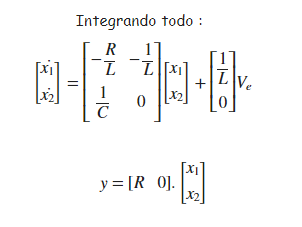


####         2)Curvas del circuito RLC para una entrada de 12V:

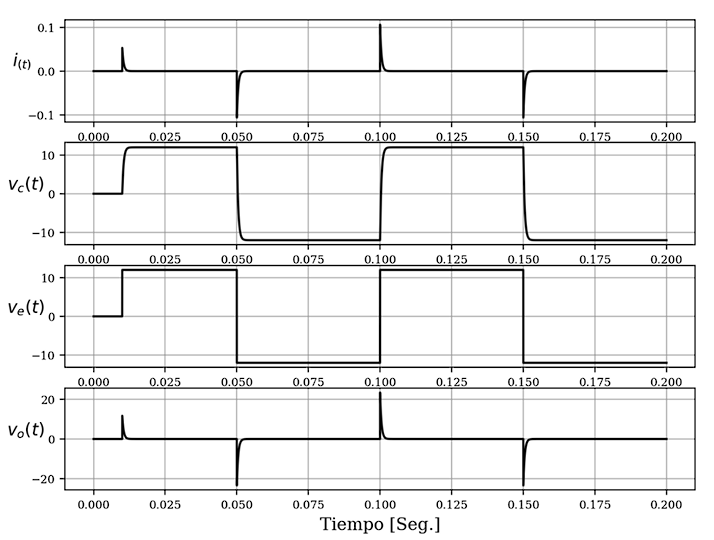



### Consignas a resolver →(ítems)
### Ítem\[1\]

&nbsp;&nbsp;&nbsp;&nbsp; Asignar valores a R=220Ω , L=500mHy, y C=2,2μF. Obtener simulaciones que permitan  estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada  1ms cambia  de signo.

#### Resolución

 Para estudiar la dinámica del sistema se procede a realizar los siguientes pasos:


In [1]:
clear all; clc; close all;


-  Declarar los Parámetros  de diseño y  matrices que forman las ecuaciones de estados  :

In [2]:
R= 220;%[ohm]
L= 500e-3;%[Hy]
Cap= 2.2e-6; %[F]
V_e = 12;% [V] voltaje de entrada
%Matrices del espacio
A= [-R/L -1/L ; 1/Cap 0]; % Matriz de estados
B= [1/L ; 0]; %Matriz de entrada
C= [R 0]; %Matriz de salida
D=[0]; %Matriz de transmisión directa


-  También es importante declarar el punto de operación,es necesario para encontrar las ecuaciones de estado:

In [3]:
%Punto de operación de V y I
I1(1)=0;
Vc(1)=0;
y(1)=0;
Xop=[0 0]' ;
x=[I1(1) Vc(1)]';


-  Obtener  la FT a partir de las matrices del espacio de estado → me sirve para calcular los polos  y por ende el comportamiento de estabilidad del sistema y los tiempos de simulación

In [4]:

%convierte de espacio de estados a función de transferencia
[numF,denF] = ss2tf(A,B,C,D)

numF = 1x3
     0   440     0
denF = 1x3
1.0e+05 *
    0.0000    0.0044    9.0909

In [5]:
%Función de transferencia del sistema
F=tf(numF,denF)

F =
 
          440 s
  ----------------------
  s^2 + 440 s + 9.091e05
 
Continuous-time transfer function.
Model Properties

In [6]:
%Polos de la FT
poles=roots(denF) % POLOS complejos conjugados :representan una respuesta temp SUBamortiguada en el tiempo 0<ξ<1

poles = 2x1 complex
1.0e+02 *
  -2.2000 + 9.2773i
  -2.2000 - 9.2773i

In [7]:

% saco la parte imaginaria del polo = Wd
Wd1=imag(poles(1))

Wd1 = 927.7343

In [8]:
Wd2= imag(poles(2))

Wd2 = -927.7343

In [9]:
%Proporciona ξ y Wn de la FT
[Wn,zita]=damp(F)

Wn = 2x1
  953.4626
  953.4626
zita = 2x1
    0.2307
    0.2307

In [10]:
%damp(F) me proporciona mas información


  Como los polos son complejos conjugados, representan una respuesta temp. <u>**sub**</u>amortiguada en el tiempo **<samp>0<ξ<1</samp>** ,  para calcular los tiempos de simulación y de integración se debe considerar la ***frecuencia de oscilación***  $W_d$ (parte imaginaria de los polos) y calcular su período que nos da  el tiempo de integración si le tomamos su centesíma parte. Siendo este un número muy pequeño.


In [11]:
%Cálculo de Período de Wd1
t_d=(2*pi)/Wd1

t_d = 0.0068

In [12]:
%time de integración
delta=t_d/100 %

delta = 6.7726e-05

In [13]:
%----


Para el tiempo de simulación se toma la constante de tiempo más lenta( 5%)  y la parte real del polo, en este caso que son imaginarios.


Luego se multiplica para tener más períodos para analizar mejor la dinámica del sistema.


In [14]:
t_l=log(0.05)/(real(poles(1)))

t_l = 0.0136

In [15]:
t_sim=3*t_l

t_sim = 0.0409


Como  se pide una simulación con una entrada que cambie de signo cada 10 ms entonces Tsim debe ser mayor lo cual se cumple ya que nos da  $t_{\mathrm{sim}} =0\ldotp 0409$


 <samp>La cantidad de puntos  esta definido por:</samp>


In [16]:
step=round(t_sim/delta) %cant. de puntos de sim.= time total de simu/time que dura cada tamaño de paso

step = 603


Sabiendo la cantidad de puntos  necesarios se contruye el vector tiempo  y con  el punto de operación se puede definir la señal de entrada:


In [17]:
%vector inicial de la entrada

t = linspace(0, t_sim, step);

u=linspace(0,0,step);

ii=0;

for i=1:step-1
    ii = ii + delta; %Variable acumuladora de tiempo -Creación de  u(t)
    if(ii >= 10e-3) %porque conmuta cada 10 milisegundo
        ii=0;
        V_e=V_e*-1; %Cambio el sentido de crecimiento
    end
    u(i)= V_e;
%Aplicación de Euler
    xp=A*(x-Xop)+B*u(i); %representa la funcion derivada de X
    x=x+xp*delta;    %% Obtengo el valor de X a partir de los valores de su derivada
    Y=C*x;           %Almacena el valor actual de la salida

    %Siempre hago referencia al valor siguiente, ya que el primer valor
    % siempre es cero
    y(i+1)=Y(1);    %Hago que el valor siguiente sea el actual
    I1(i+1)=x(1);
    Vc(i+1)=x(2);
end
u(end)=u(end-1);


Gráficas


In [18]:
disp('Simulación completada')

Simulación completada


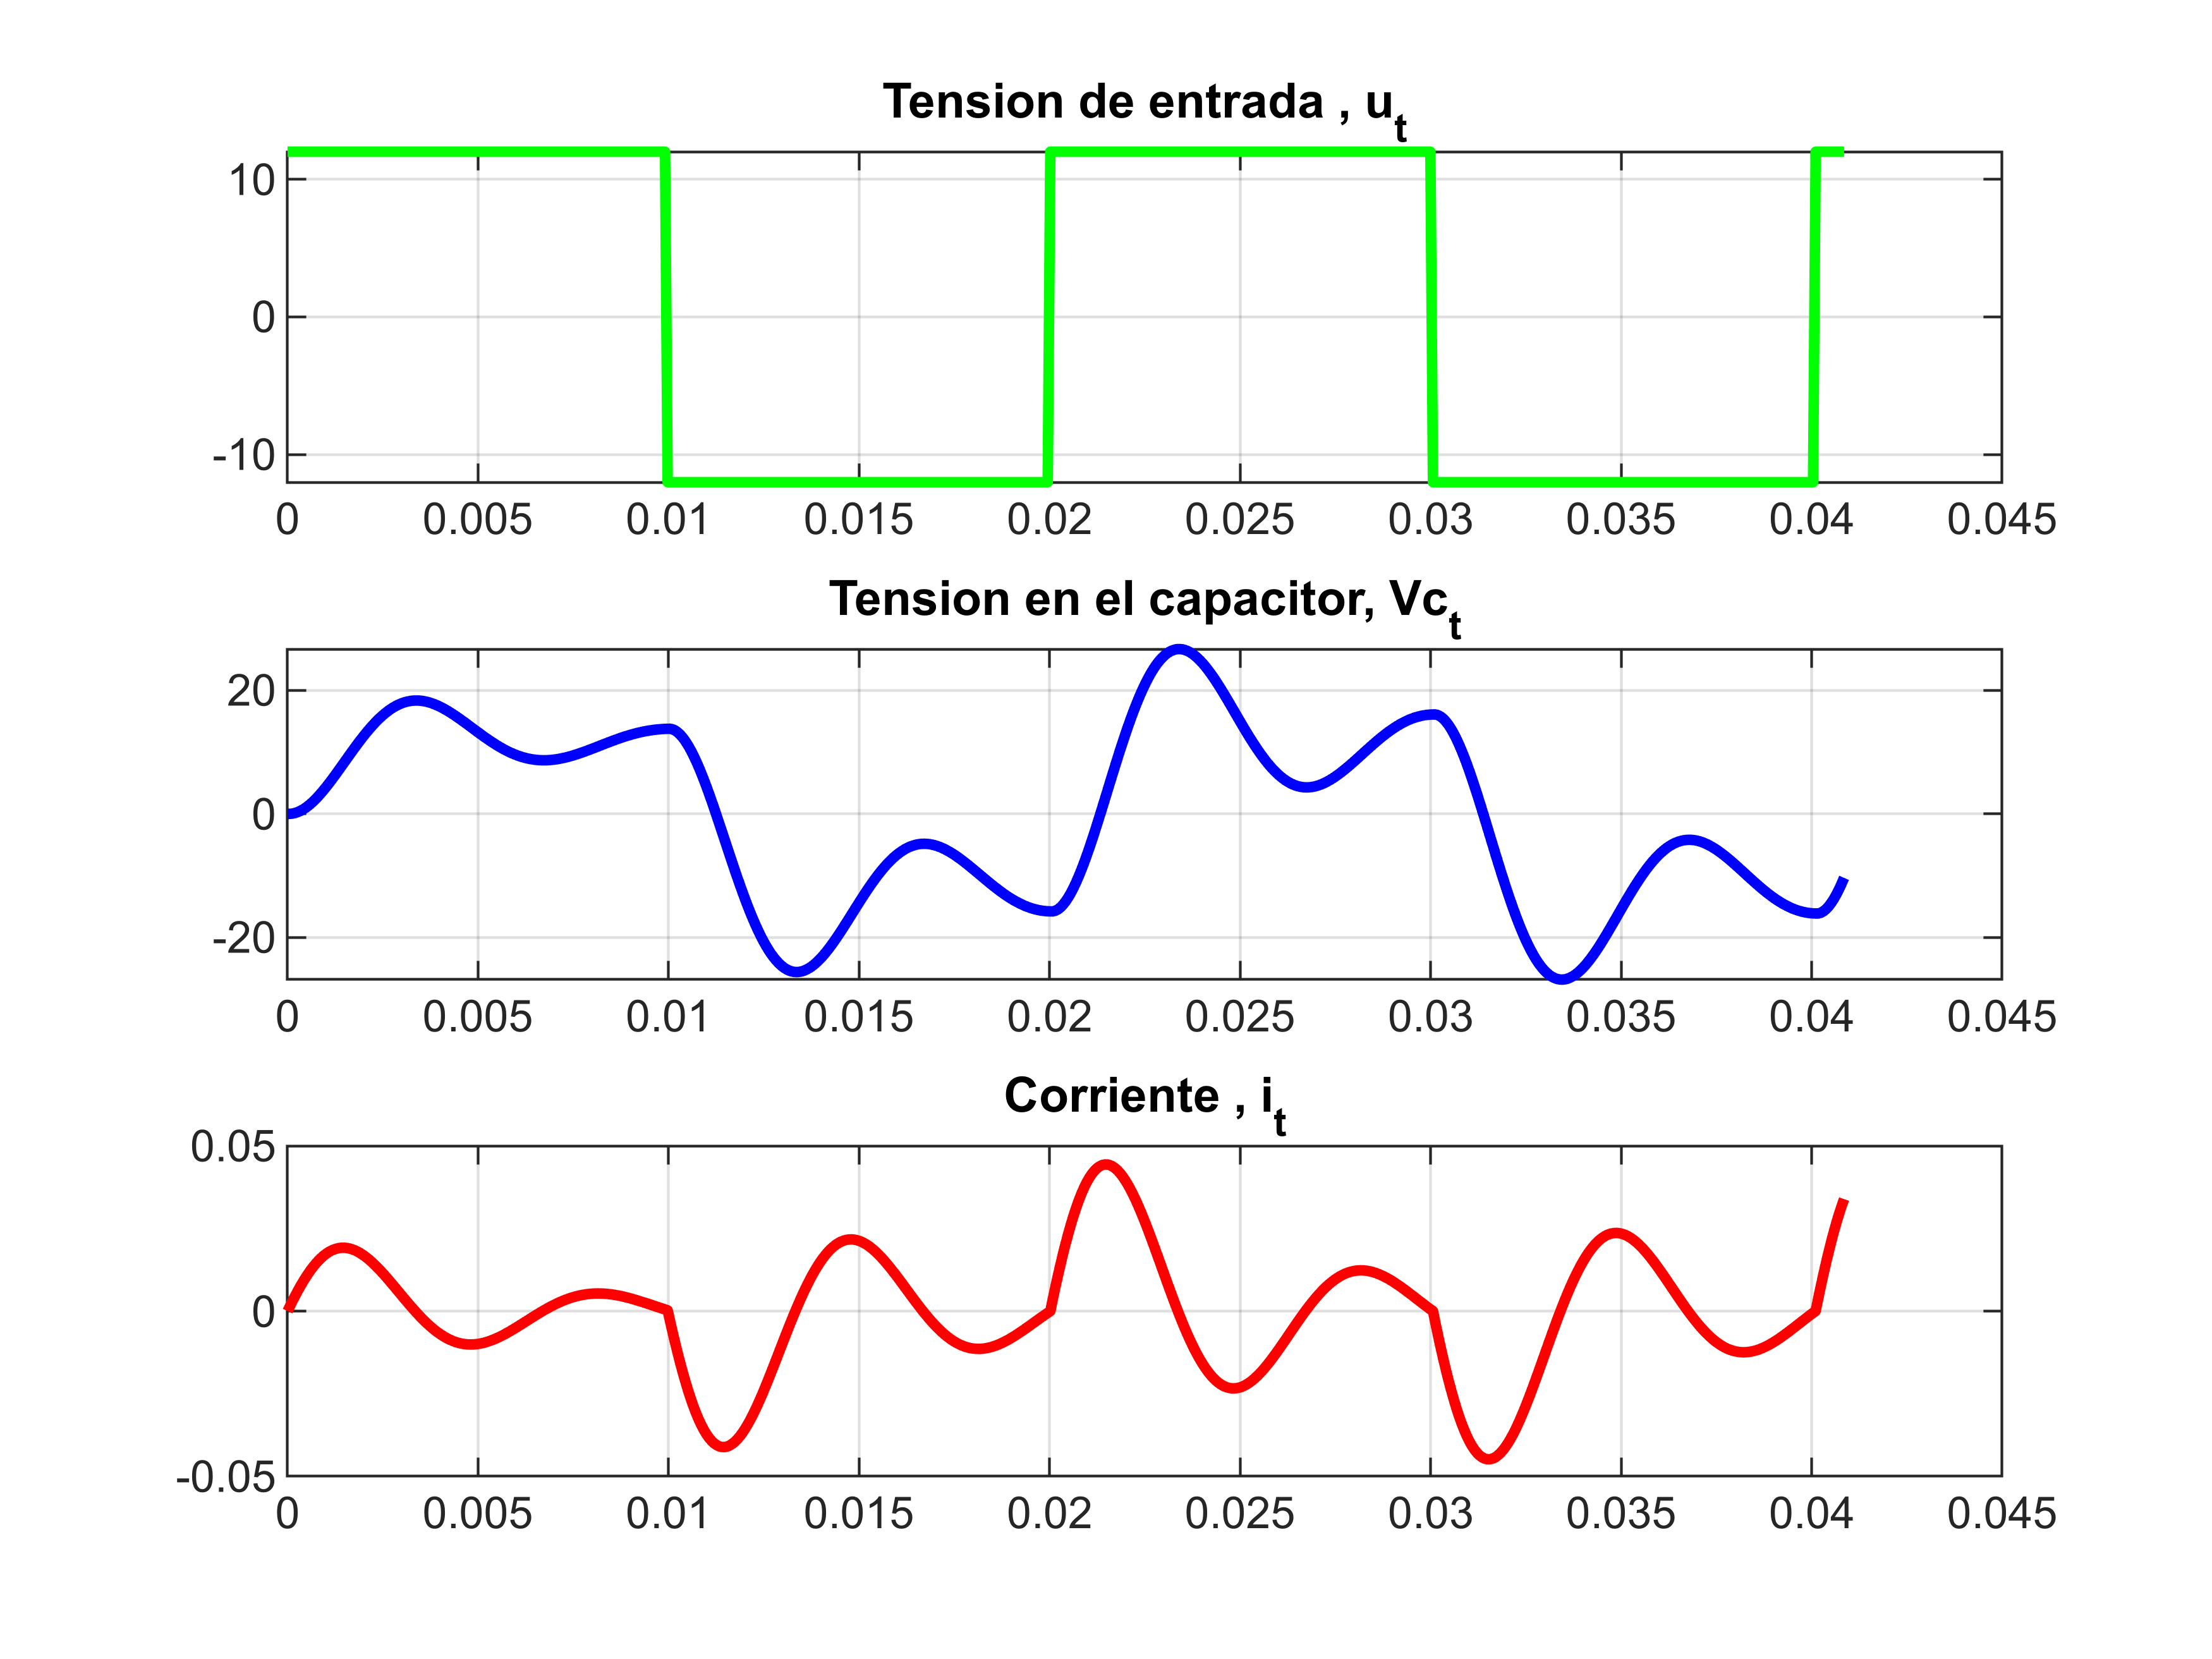

In [19]:
figure(1);
hold on
subplot(3,1,1)
plot(t,u,'green','LineWidth',2); title('Tension de entrada , u_t')
grid on
subplot(3,1,2)
plot(t,Vc,'blue','LineWidth',2); title('Tension en el capacitor, Vc_t')
grid on
subplot(3,1,3);
plot(t,I1,'red','LineWidth',2); title('Corriente , i_t');
grid on;

In [20]:
drawnow;

In [21]:
disp("¡Simulación finalizada!")

¡Simulación finalizada!


### Conclusiones

La razón por la que es oscilatorio es debido  a los polos que nos da una señal subamortiguada donde la respuesta que se obtiene es acorde  a esto :


Con $t_{\mathrm{sim}} =3*t_L$ se obtiene la siguiente gráfica:

<p style="text-align:left">
   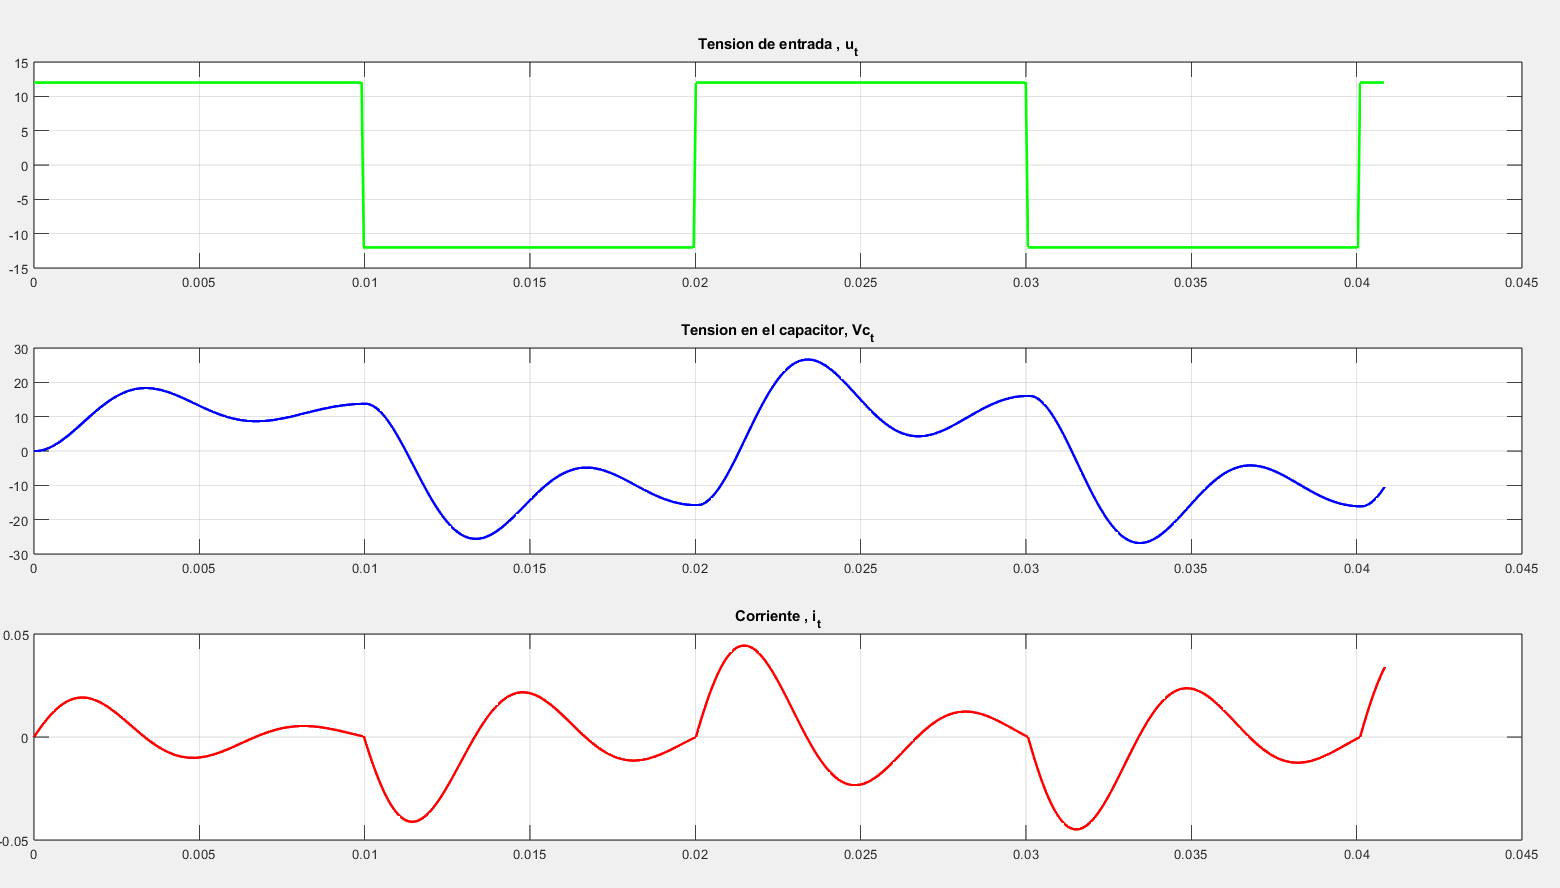
</p>


Se puede apreciar que en el voltaje del capacitor (fig 2)  hay oscilaciones cada vez que cambia el valor de la entrada.


Donde la tensión del capacitor puede superar momentáneamente los 12 V de entrada debido al intercambio de energía entre el inductor y el capacitor durante las oscilaciones transitorias. El inductor impulsa corriente hacia el capacitor incluso después de que ha alcanzado la tensión de la fuente, generando un sobrepaso que es típico de un sistema subamortiguado.


La amplitud de estas oscilaciones decae con el tiempo hasta estabilizarse, lo cual indica **pérdida de energía.**


Por otro lado,  en el gráfico de la corriente  (fig 3) hay una valoración directa entre los picos de corriente y los flancos del escalón de entrada. Esto tiene sentido ya que la corriente en una serie RLC es común a todos los elementos, y es la que produce el cambio en las tensiones de los elementos almacenadores (L y C).


Además, se puede observar que el primer pico resulta ser menor al resto debido a que, en un comienzo, el capacitor se encontraba descargado, llegando solo hasta los  19 mA y en los siguientes períodos el pico es de 44mA


Para apreciar mejor se muestra con Con $t_{\mathrm{sim}} =2*t_L$

<p style="text-align:left">
   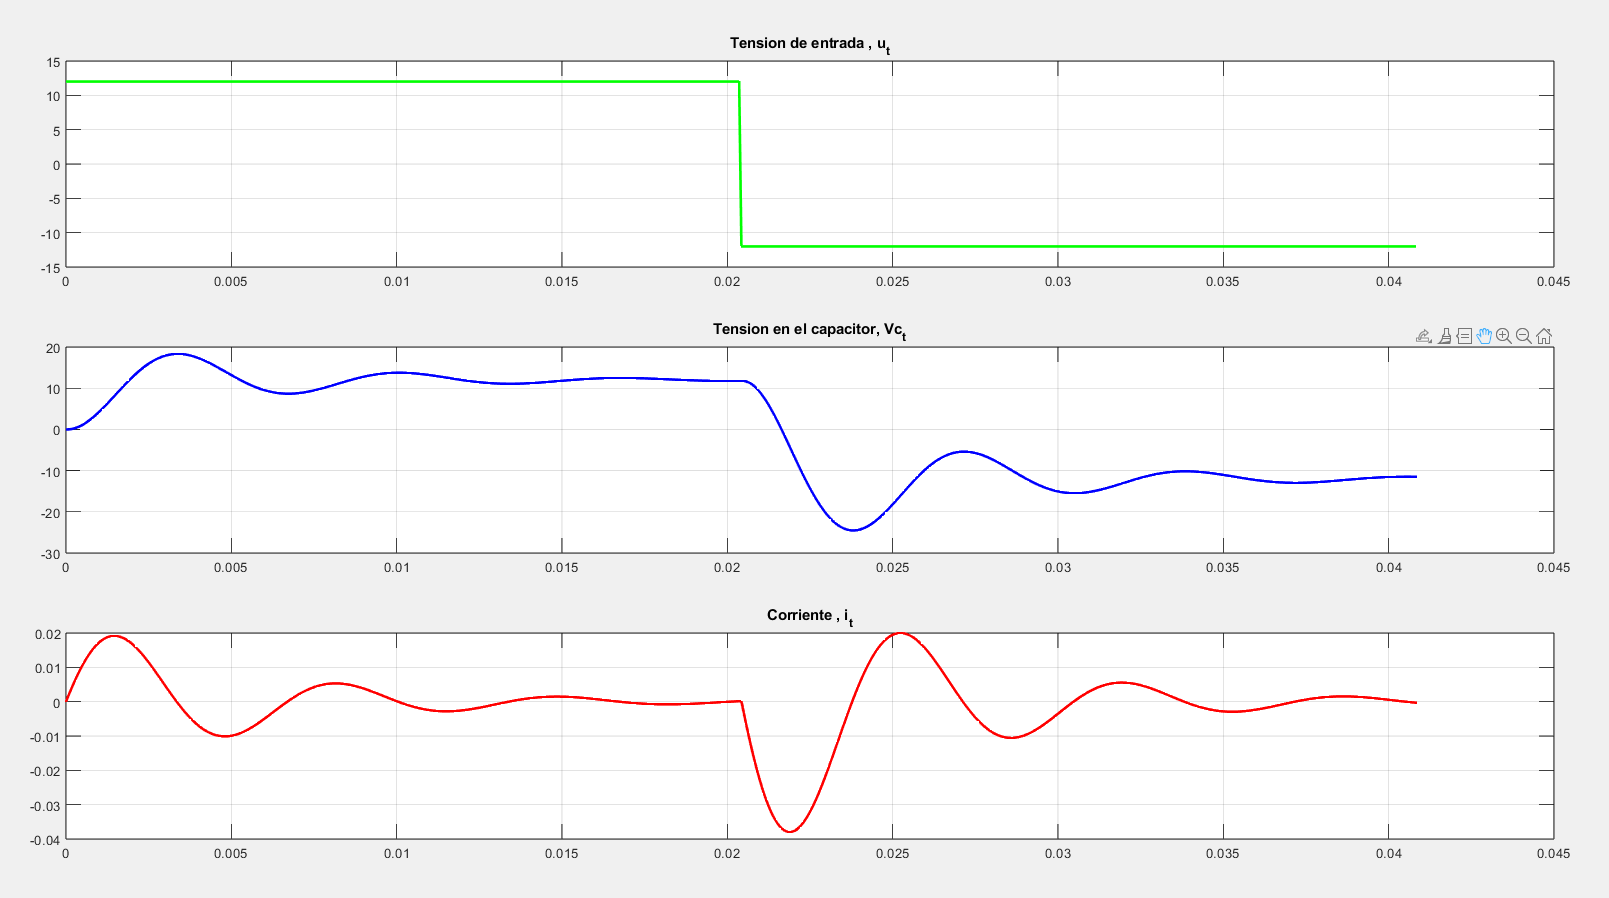
</p>


Para verificar que el resultado sea coherente se planteo la solución analítica del circuito obteniendo:

<p style="text-align:left">
   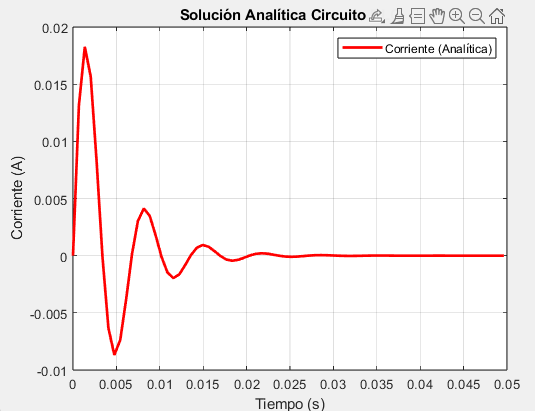
</p>


 En la respuesta al pulso cuadrado**,** la conmutación periódica genera oscilaciones amortiguadas tanto en la corriente como en la tensión del capacitor, sin que el sistema llegue al régimen permanente.Por este motivo para lograr apreciar que se verifica lo analítico con lo aproximado se  modifica  el tiempo en alto de la señal de entrada  para 40 mS  ya que el código de solucion analítica solo tiene una exitación en alto.

<p style="text-align:left">
   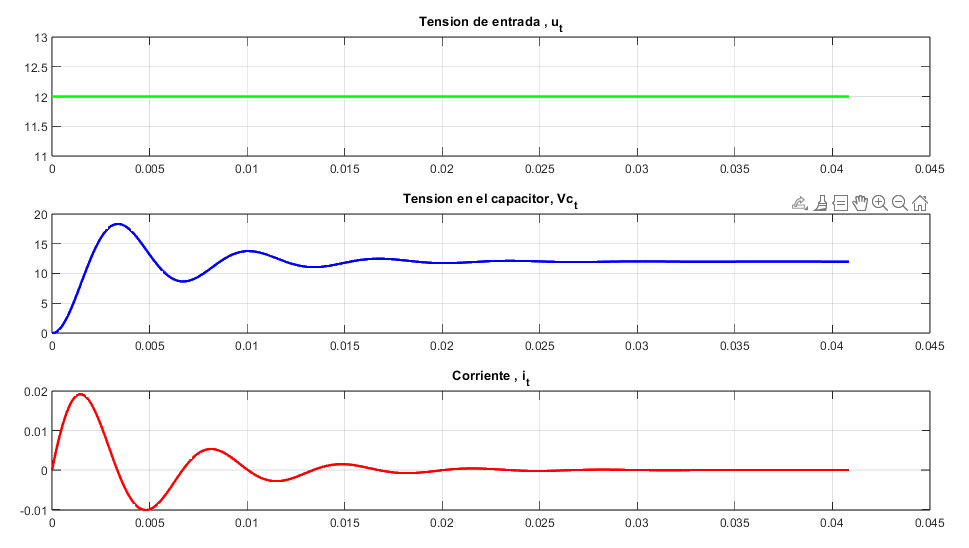
</p>


